# Bank dataset prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

importing all the nessasary lybraries for the dataset

In [2]:
train=pd.read_csv('bank_train_dataset.csv')
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


loading the train dataset from my jupyternote book

In [3]:
test=pd.read_csv('bank_test_dataset.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


loading the test dataset from my jupyter notebook

In [4]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

columns in the train dataset

In [5]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

columns present in the test datset

all the columns are same in both train and test dataset except the subscribed column

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


there are 31647 rows present and 17columns present in the train dataset

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


here 13564 rows and 16 columns present in test dataset

In [8]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

there is no null values present in the train dataset

In [9]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

in test dataset also there is no null values

In [10]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

checking the value counts for target variable 

# EDA

<AxesSubplot:xlabel='subscribed', ylabel='count'>

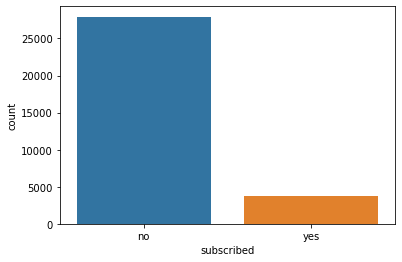

In [11]:
sns.countplot(data=train,x='subscribed')

analysing the target column 

<AxesSubplot:xlabel='job', ylabel='count'>

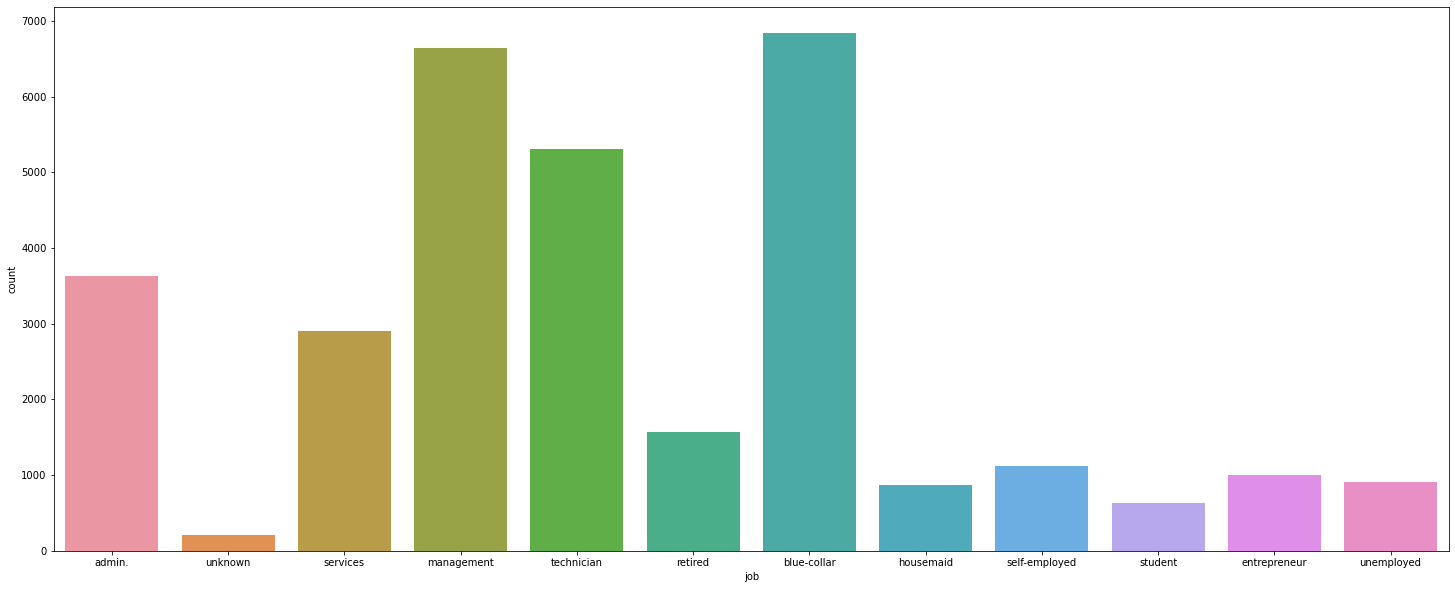

In [12]:
plt.figure(figsize=(25,10))
sns.countplot(data=train,x='job')

analysing the job column , value counts for each profesion how many people are present

yes    17584
no     14063
Name: housing, dtype: int64


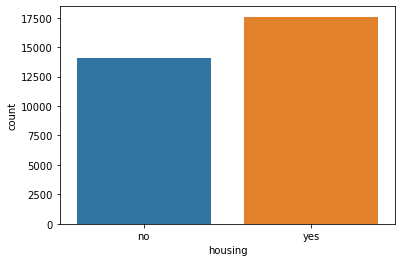

In [13]:
sns.countplot(data=train,x='housing')
print(train['housing'].value_counts())

17584 people has own house and 14063 people not having the own house

<AxesSubplot:>

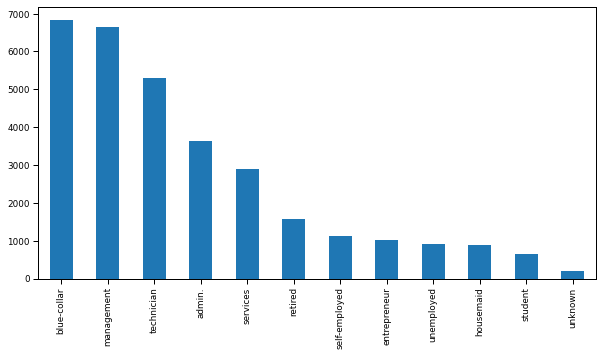

In [14]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar',figsize=(10,5))

analysing the job , to identify why work profesion has mejority

<AxesSubplot:>

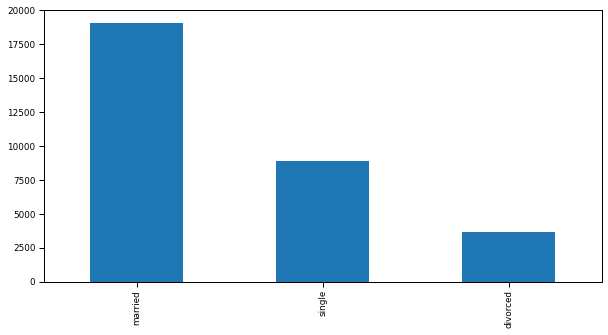

In [15]:
sns.set_context('paper')
train['marital'].value_counts().plot(kind='bar',figsize=(10,5))

married people are more compared to single and divorced

<AxesSubplot:>

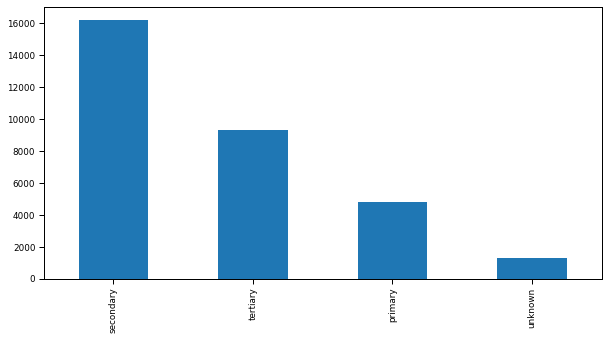

In [16]:
train['education'].value_counts().plot(kind='bar',figsize=(10,5))

education columns shows mejority of people are completed secondary education

no     26516
yes     5131
Name: loan, dtype: int64


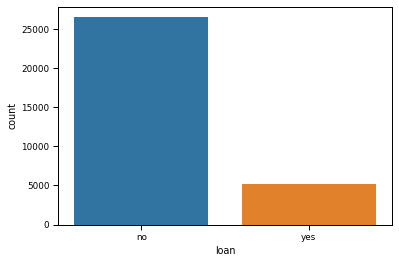

In [17]:
sns.countplot(data=train,x='loan')
print(train['loan'].value_counts())

in loan column we can see most of are not taken the loan

<AxesSubplot:xlabel='marital', ylabel='count'>

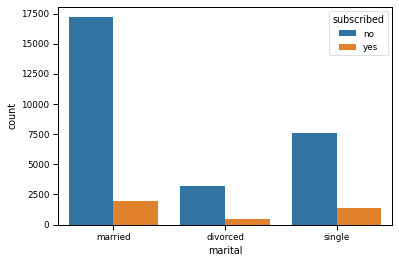

In [18]:
sns.countplot(data=train,x='marital',hue='subscribed')

married people are subscribed more and followed by single and divorced people

<AxesSubplot:xlabel='job', ylabel='count'>

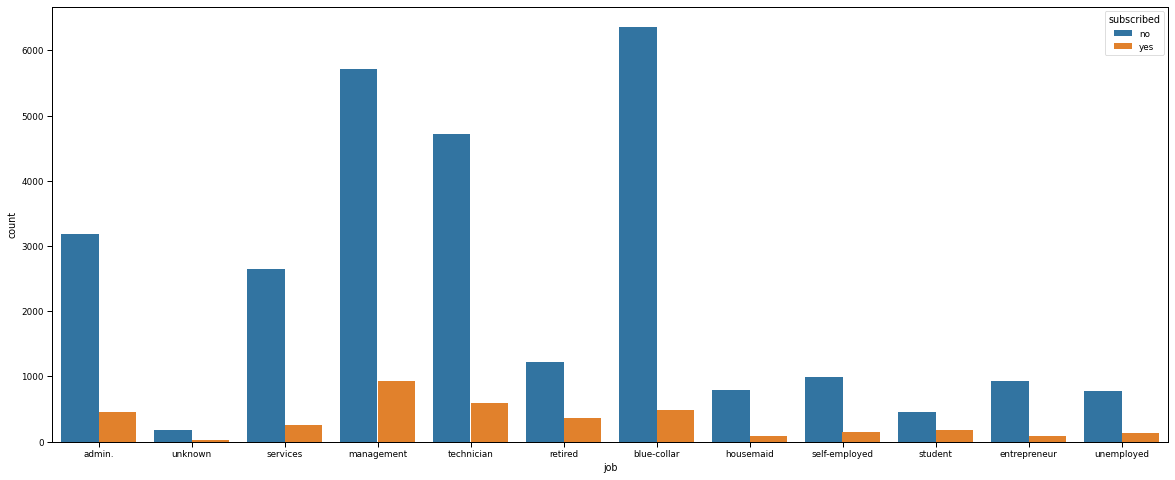

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(data=train,x='job',hue='subscribed')

working as management are subscribed more and fallowed by technician

<AxesSubplot:xlabel='contact', ylabel='count'>

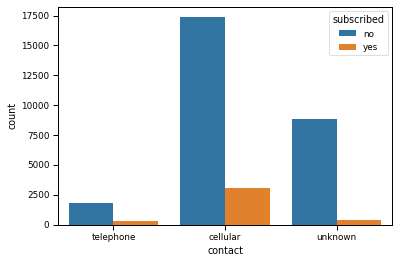

In [20]:
sns.countplot(data=train,x='contact',hue='subscribed')

people having cellular contact are subscribed more

<AxesSubplot:xlabel='loan', ylabel='count'>

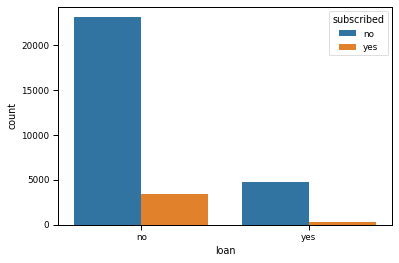

In [21]:
sns.countplot(data=train,x='loan',hue='subscribed')

people who are not taken loan are subscribed more compared to loan taken

In [22]:
df=pd.concat([train,test])

Murging the both train and test dataset for further process with the help of concat method

In [23]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 13563
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


after merging the datasets we can see there are 45211 rows and 18 columns are present 

2 types of data is present here interger and object datatype

In [25]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0,NaN
13560,11743,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0,NaN
13561,28292,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0,NaN
13562,45163,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0,NaN


in the dataset mejority of the columns are object datatype and we need to convert it into numarical datatype

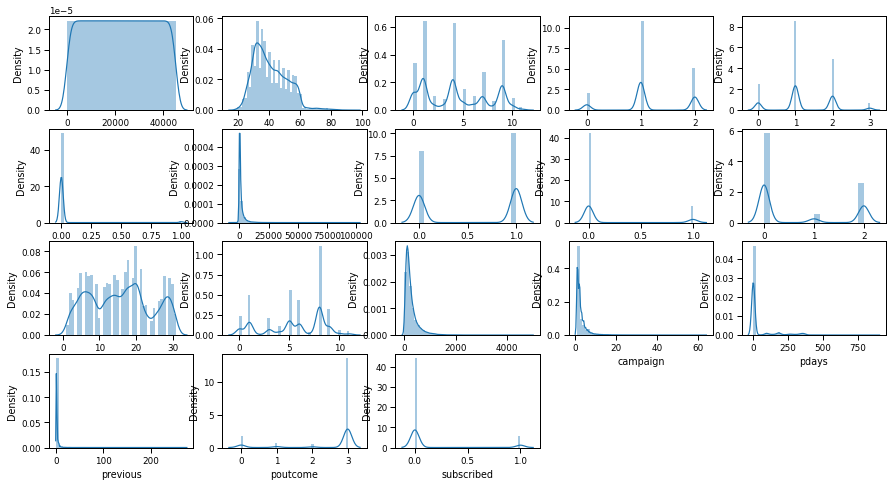

In [27]:
plt.figure(figsize=(15,10))

p=1

for i in df.columns:
    if p<25:
        plt.subplot(5,5,p)
        sns.distplot(df[i])
        plt.xlabel(i)
        
    p+=1
    
plt.show()

checking for the skewness of the all the columns 

In [28]:
df.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.014973,0.063002,0.081781,0.094658,-0.053098,0.073639,-0.176143,-0.084240,-0.722366,-0.061465,-0.162055,0.013031,-0.102884,0.437729,0.271098,-0.445365,0.296663
age,0.014973,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.024538
job,0.063002,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.038921
marital,0.081781,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.046043
education,0.094658,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066051
default,-0.053098,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.020168
balance,0.073639,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.050807
housing,-0.176143,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.141092
loan,-0.084240,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.072266
contact,-0.722366,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.150051


<AxesSubplot:>

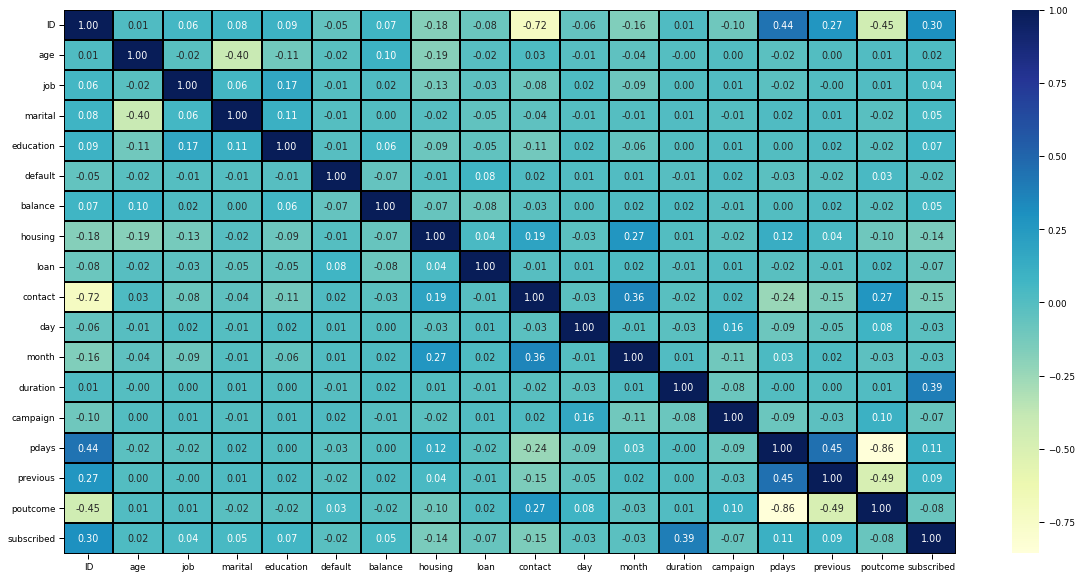

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidth=0.2,cmap='YlGnBu')

duration column is highly positive co reletion with the target column

some columns like housing,contact,loan are negative co reletion with the target column

In [30]:
df.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

subscribed columns has 13564 missing values...
we need to drop the rows 

In [31]:
df.dropna(inplace=True)

using the pandas drop method to drop the missing value rows

In [33]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

now there is no missing values in the dataset

In [34]:
x=df.iloc[:,:-1]
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0
1,40576,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0
2,15320,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0
3,43962,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0
4,29842,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0
31643,40178,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0
31644,19710,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0
31645,38556,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0


separating the independent variables as x 

In [35]:
y=df.iloc[:,-1]
y

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
31642    0.0
31643    1.0
31644    0.0
31645    0.0
31646    1.0
Name: subscribed, Length: 31647, dtype: float64

separated the target varibale as y

In [36]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

we need to resample the target columns for increasing the number of cases in the dataset need to balance

In [37]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

using SMOTE technique to balance the dataset

In [38]:
y.value_counts()

0.0    27932
1.0    27932
Name: subscribed, dtype: int64

now we can see that the target column is balanced

# Modelling

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

since the target varible is binary values its an Binary Classification model

importing the DecisionTreeClassifier and accuracy_score,confusion_matrix

In [40]:
maxAccu=0
maxRs=0

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
        
        
print('Best accuracy score is ',maxAccu,'at the random state of ',maxRs)

Best accuracy score is  0.9288782816229116 at the random state of  503


performing the model for best Random state for model

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

splitting the model for traing and splitting to perform the model

In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier


importing all important lybraries to find the best performing the best model

In [43]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
predsvc_train=svc.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predsvc)*100)
print('Accuracy score on train data',accuracy_score(y_train,predsvc_train)*100)
print('Classification report ','\n',classification_report(y_test,predsvc))
print('Confusion matrix ','\n',confusion_matrix(y_test,predsvc))

Accuracy score on test data 82.12410501193318
Accuracy score on train data 82.18596563011457
Classification report  
               precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      8372
         1.0       0.83      0.81      0.82      8388

    accuracy                           0.82     16760
   macro avg       0.82      0.82      0.82     16760
weighted avg       0.82      0.82      0.82     16760

Confusion matrix  
 [[6940 1432]
 [1564 6824]]


with support vector mission the accuracy score is 82%

In [44]:
print('RandomForestClassifier')
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
predrf_train=rf.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predrf)*100)
print('Accuracy score on train data',accuracy_score(y_train,predrf_train)*100)
print('Classification report ','\n',classification_report(y_test,predrf))
print('Confusion matrix ','\n',confusion_matrix(y_test,predrf))
print('\n')

print('ExtraTreesClassifier')
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
predet_train=et.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predet)*100)
print('Accuracy score on train data',accuracy_score(y_train,predet_train)*100)
print('Confusion matrix','\n',confusion_matrix(y_test,predet))
print('Classification report ',classification_report(y_test,predet))

RandomForestClassifier
Accuracy score on test data 95.30429594272076
Accuracy score on train data 100.0
Classification report  
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      8372
         1.0       0.95      0.96      0.95      8388

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760

Confusion matrix  
 [[7914  458]
 [ 329 8059]]


ExtraTreesClassifier
Accuracy score on test data 96.02625298329356
Accuracy score on train data 100.0
Confusion matrix 
 [[7941  431]
 [ 235 8153]]
Classification report                precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      8372
         1.0       0.95      0.97      0.96      8388

    accuracy                           0.96     16760
   macro avg       0.96      0.96      0.96     16760
weighted avg       0.96      0.96      0.96     1676

with RandomForestClassifier accurcy score is 95% and with ExtraTreeClassifier the accuracy score is 96%

In [45]:
print('GradientBoostingClassifier')
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb_train=gb.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predgb)*100)
print('Accuracy score on train data',accuracy_score(y_train,predgb_train)*100)
print('Classification report','\n',classification_report(y_test,predgb))
print('Confusion matrix','\n',confusion_matrix(y_test,predgb))
print('\n')

print('AdaBoostClassifier')
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
predad_train=ad.predict(x_train)
print('Accuracy score on test data ',accuracy_score(y_test,predad)*100)
print('Accuracy score on train data ',accuracy_score(y_train,predad_train)*100)
print('Classification report','\n',classification_report(y_test,predad))
print('Confusion matrix','\n',confusion_matrix(y_test,predad))
print('\n')

print('BaggingClassifier')
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
predbc_train=bc.predict(x_train)
print('Accuracy score on test data',accuracy_score(y_test,predbc)*100)
print('Accuracy score on train data',accuracy_score(y_train,predbc_train)*100)
print('Classification report','\n',classification_report(y_test,predbc))
print('Confusion matrix ','\n',confusion_matrix(y_test,predbc))
print('\n')

print('DecisionTreeClassifier')
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc_train=dtc.predict(x_train)
print('Accuracy score on test data ',accuracy_score(y_test,preddtc)*100)
print('Accuracy score on train data',accuracy_score(y_train,preddtc_train)*100)
print('Confusion matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification report','\n',classification_report(y_test,preddtc))

GradientBoostingClassifier
Accuracy score on test data 93.6217183770883
Accuracy score on train data 93.93923895253683
Classification report 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      8372
         1.0       0.93      0.94      0.94      8388

    accuracy                           0.94     16760
   macro avg       0.94      0.94      0.94     16760
weighted avg       0.94      0.94      0.94     16760

Confusion matrix 
 [[7778  594]
 [ 475 7913]]


AdaBoostClassifier
Accuracy score on test data  91.99880668257757
Accuracy score on train data  92.21307283142389
Classification report 
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      8372
         1.0       0.93      0.91      0.92      8388

    accuracy                           0.92     16760
   macro avg       0.92      0.92      0.92     16760
weighted avg       0.92      0.92      0.92     16760

Confusion matrix 

with GradientBoostingClassifier the accuracy score is 93%

with AdaBoostClassifier the accuracy score is 94%

with BaggingClassifier the accuracy score is 94%

and with DecisionTreeClassifier the accuracy score is 92%

In [46]:
from sklearn.model_selection import cross_val_score

importing the Cross Validation technique to avoid the over fitting and under fitting 

In [47]:
print('Support vector')
scoresvc=cross_val_score(svc,x,y)
print('Score',scoresvc)
print('Mean score ',scoresvc.mean())
print('\n')

print('RandomForestClassifier')
scorerf=cross_val_score(rf,x,y)
print('Score',scorerf)
print('Mean score ',scorerf.mean())
print('\n')

print('ExtratreesClassifier')
scoreet=cross_val_score(et,x,y)
print('Score',scoreet)
print('Mean score ',scoreet.mean())
print('\n')

print('GradientBoostingClassifier')
scoregb=cross_val_score(gb,x,y)
print('Score ',scoregb)
print('Mean score ',scoregb.mean())
print('\n')

print('AdaBoostClassifier')
scoreab=cross_val_score(ad,x,y)
print('Score ',scoreab)
print('Mean score',scoreab.mean())
print('\n')

print('BaggingClassifier')
scorebc=cross_val_score(bc,x,y)
print('Score',scorebc)
print('Mean score',scorebc.mean())
print('\n')

print('DecisionTreeClassifier')
scoredtc=cross_val_score(dtc,x,y)
print('Score',scoredtc)
print('Mean score',scoredtc.mean())

Support vector
Score [0.8240401  0.82833617 0.82788866 0.82806766 0.81919083]
Mean score  0.8255046843432243


RandomForestClassifier
Score [0.8057818  0.96509442 0.9634834  0.96768997 0.96661296]
Mean score  0.9337325089583992


ExtratreesClassifier
Score [0.89653629 0.97234404 0.969838   0.97091202 0.97189402]
Mean score  0.9563048759334245


GradientBoostingClassifier
Score  [0.75682449 0.95220621 0.95023718 0.9515797  0.95005371]
Mean score  0.9121802569355714


AdaBoostClassifier
Score  [0.77669382 0.94415108 0.9452251  0.94817864 0.94083423]
Mean score 0.9110165727061386


BaggingClassifier
Score [0.79199857 0.95927683 0.95856082 0.96276739 0.96195847]
Mean score 0.9269124131113863


DecisionTreeClassifier
Score [0.78922402 0.94629911 0.94289806 0.94236105 0.94790548]
Mean score 0.9137375441775347


After Cross validation best Performing model is ExtraTreesClassifier and the Accuracy score is 95%

In [48]:
from sklearn.model_selection import GridSearchCV

to find the best parameters for the model to perform well, importing the GridSearchCV

In [49]:
parameters={'criterion':['gini','entropy'],
           'random_state':[10,20,100],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,150,200]}

In [50]:
gscv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 20}

after the GridsearchCV, got the best parameters to build the best model

In [59]:
model=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=100,n_jobs=-2,random_state=20)

the final model is with best parameters 

In [60]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy score is ',accuracy_score(y_test,pred)*100)

Accuracy score is  94.85680190930788


checking for the accuracy score with model with best parameters

In [61]:
import pickle
file='Banking_model'
pickle.dump(model,open('Banking_model','wb'))

Saving the model with the help of pickle lybrary and using the dump method

In [62]:
final_model=pickle.load(open('Banking_model','rb'))
final_model.score(x_test,y_test)*100


94.85680190930788

loading the saved model from the jupyter notebook and 

The Best accuracy_score is 95%